#### IMPORTING LIBRARIES

In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings(action="ignore")

#### LOAD DATA INTO DATAFRAME

In [3]:
well_df= pd.read_csv(r"C:\Users\User\Desktop\Machine Learning Project\ROP Prediction\Well_58-32.csv")

In [4]:
well_df.head()

,Depth(ft),Depth(m),ROP(1 ft),ROP(1 m),weight on bit (k-lbs),weight on bit (kg),Temp Out( degF),Temp Out( degC),Temp In(degF),Temp In(degC),...,Surface Torque (KPa),Rotary Speed (rpm),Flow In (gal/min),Flow In(liters/min),Flow Out %,WH Pressure (psi),WH Pressure (KPa),H2S Floor,H2S Cellar,H2S Pits
0,85.18,25.96,56.80,17.31,0.0,0.0,93.49,34.16,90.87,32.71,...,61.57,151.09,1109.58,4200.22,101.61,-1230.69,-8485.61,-0.01,-0.03,0.31
1,86.18,26.27,61.14,18.63,0.0,0.0,93.52,34.18,90.83,32.68,...,61.57,151.09,1108.36,4195.60,101.70,-1230.69,-8485.61,-0.01,-0.04,0.31
2,87.23,26.59,18.58,5.66,0.0,0.0,94.25,34.58,90.91,32.73,...,62.12,61.54,1102.87,4174.82,96.81,-1230.69,-8485.61,-0.01,-0.03,0.30
3,88.26,26.90,38.29,11.67,0.0,0.0,94.44,34.69,91.14,32.86,...,61.85,60.23,1101.04,4167.89,96.67,-1230.69,-8485.61,0.00,-0.03,0.31
4,89.36,27.24,394.38,120.20,0.0,0.0,94.48,34.71,91.18,32.88,...,61.85,61.75,1102.46,4173.26,96.63,-1230.69,-8485.61,-0.02,-0.02,0.31


#### EXPLORE DATA

In [5]:
well_df.shape

(7311, 27)

In [6]:
well_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7311 entries, 0 to 7310
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Depth(ft)              7311 non-null   float64
 1   Depth(m)               7311 non-null   float64
 2   ROP(1 ft)              7311 non-null   float64
 3   ROP(1 m)               7311 non-null   float64
 4   weight on bit (k-lbs)  7311 non-null   float64
 5   weight on bit (kg)     7311 non-null   float64
 6   Temp Out( degF)        7311 non-null   float64
 7   Temp Out( degC)        7311 non-null   float64
 8   Temp In(degF)          7311 non-null   float64
 9   Temp In(degC)          7311 non-null   float64
 10  Pit Total (bbls)       7311 non-null   float64
 11  Pit Total (m3)         7311 non-null   float64
 12  Pump Press (psi)       7311 non-null   float64
 13  Pump Press (KPa)       7311 non-null   float64
 14  Hookload (k-lbs)       7311 non-null   float64
 15  Hook

In [7]:
well_df.describe()

,Depth(ft),Depth(m),ROP(1 ft),ROP(1 m),weight on bit (k-lbs),weight on bit (kg),Temp Out( degF),Temp Out( degC),Temp In(degF),Temp In(degC),...,Surface Torque (KPa),Rotary Speed (rpm),Flow In (gal/min),Flow In(liters/min),Flow Out %,WH Pressure (psi),WH Pressure (KPa),H2S Floor,H2S Cellar,H2S Pits
count,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,...,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000,7311.000000
mean,3835.043935,1168.864378,42.010324,12.804158,23.116699,10483.764002,126.059506,52.255297,118.315593,47.953090,...,903.132323,54.947292,716.254127,2711.315497,79.692834,-35.760875,-246.571280,-0.027372,0.004303,0.148833
std,2147.503980,654.527243,75.921118,23.139621,9.119495,4135.825227,12.259879,6.811023,11.933137,6.629486,...,335.832421,25.947654,141.784179,536.711275,11.909399,222.669489,1535.306539,0.042453,0.025282,0.115290
min,85.180000,25.960000,0.000000,0.000000,0.000000,0.000000,84.070000,28.930000,85.000000,29.440000,...,0.000000,0.000000,0.000000,0.000000,0.690000,-1231.830000,-8493.470000,-0.100000,-0.080000,-0.060000
25%,1970.395000,600.545000,11.400000,3.470000,18.310000,8303.850000,116.130000,46.740000,108.850000,42.695000,...,806.715000,38.090000,620.260000,2347.940000,72.650000,2.920000,20.130000,-0.070000,-0.010000,0.060000
50%,3851.850000,1173.990000,17.990000,5.480000,23.830000,10807.260000,124.860000,51.590000,117.220000,47.340000,...,967.440000,50.380000,700.210000,2650.580000,80.710000,5.940000,40.960000,-0.010000,0.000000,0.140000
75%,5691.585000,1734.710000,44.295000,13.500000,29.680000,13460.320000,136.490000,58.050000,126.860000,52.700000,...,1084.450000,75.965000,824.610000,3121.485000,88.845000,8.260000,56.950000,0.000000,0.020000,0.220000
max,7536.250000,2296.940000,2977.910000,907.620000,47.050000,21337.870000,151.700000,66.500000,146.310000,63.510000,...,1887.230000,271.580000,3317.510000,12558.140000,111.210000,17.410000,120.040000,0.780000,0.070000,0.720000


In [8]:
corr=well_df.corr()

In [9]:
corr

,Depth(ft),Depth(m),ROP(1 ft),ROP(1 m),weight on bit (k-lbs),weight on bit (kg),Temp Out( degF),Temp Out( degC),Temp In(degF),Temp In(degC),...,Surface Torque (KPa),Rotary Speed (rpm),Flow In (gal/min),Flow In(liters/min),Flow Out %,WH Pressure (psi),WH Pressure (KPa),H2S Floor,H2S Cellar,H2S Pits
Depth(ft),1.000000,1.000000,-0.508250,-0.508247,0.760430,0.760430,0.371248,0.371243,-0.039271,-0.039279,...,0.316396,-0.565349,-0.692128,-0.692128,-0.088187,0.313164,0.313166,-0.690721,0.548084,-0.215861
Depth(m),1.000000,1.000000,-0.508250,-0.508247,0.760430,0.760430,0.371248,0.371243,-0.039271,-0.039279,...,0.316396,-0.565349,-0.692128,-0.692128,-0.088187,0.313164,0.313166,-0.690721,0.548084,-0.215861
ROP(1 ft),-0.508250,-0.508250,1.000000,1.000000,-0.523443,-0.523443,-0.426404,-0.426404,-0.221723,-0.221711,...,-0.380202,0.289070,0.481611,0.481611,-0.116062,-0.502704,-0.502705,0.264601,-0.264774,0.269291
ROP(1 m),-0.508247,-0.508247,1.000000,1.000000,-0.523441,-0.523441,-0.426404,-0.426404,-0.221725,-0.221713,...,-0.380201,0.289070,0.481607,0.481607,-0.116068,-0.502701,-0.502702,0.264600,-0.264773,0.269290
weight on bit (k-lbs),0.760430,0.760430,-0.523443,-0.523441,1.000000,1.000000,0.438224,0.438218,0.148299,0.148292,...,0.321042,-0.459251,-0.563689,-0.563689,0.078015,0.404501,0.404502,-0.456002,0.394846,-0.268175
weight on bit (kg),0.760430,0.760430,-0.523443,-0.523441,1.000000,1.000000,0.438224,0.438218,0.148299,0.148292,...,0.321042,-0.459251,-0.563689,-0.563689,0.078015,0.404501,0.404502,-0.456002,0.394846,-0.268175
Temp Out( degF),0.371248,0.371248,-0.426404,-0.426404,0.438224,0.438224,1.000000,1.000000,0.903099,0.903095,...,0.371695,-0.184888,-0.338627,-0.338627,0.390751,0.452819,0.452819,0.095773,-0.142218,-0.483076
Temp Out( degC),0.371243,0.371243,-0.426404,-0.426404,0.438218,0.438218,1.000000,1.000000,0.903101,0.903097,...,0.371688,-0.184890,-0.338627,-0.338626,0.390743,0.452823,0.452823,0.095771,-0.142223,-0.483068
Temp In(degF),-0.039271,-0.039271,-0.221723,-0.221725,0.148299,0.148299,0.903099,0.903101,1.000000,1.000000,...,0.267196,0.052881,-0.059059,-0.059059,0.467231,0.336343,0.336342,0.397616,-0.402182,-0.394690
Temp In(degC),-0.039279,-0.039279,-0.221711,-0.221713,0.148292,0.148292,0.903095,0.903097,1.000000,1.000000,...,0.267185,0.052885,-0.059049,-0.059049,0.467225,0.336336,0.336335,0.397622,-0.402186,-0.394688


#### We can see from the above dataframe that certain columns are repeated but with different unit, hence we'd select just one out of the repeated columns depending on the unit of interest.

In [10]:
well_df=well_df[['Depth(m)','weight on bit (kg)','Rotary Speed (rpm)','Pump Press (KPa)','Temp In(degC)',
        'Flow In(liters/min)','Flow Out %','WH Pressure (KPa)','ROP(1 m)']]
print("Shape :", well_df.shape)
well_df.head()

Shape : (7311, 9)


,Depth(m),weight on bit (kg),Rotary Speed (rpm),Pump Press (KPa),Temp In(degC),Flow In(liters/min),Flow Out %,WH Pressure (KPa),ROP(1 m)
0,25.96,0.0,151.09,3197.35,32.71,4200.22,101.61,-8485.61,17.31
1,26.27,0.0,151.09,3168.46,32.68,4195.60,101.70,-8485.61,18.63
2,26.59,0.0,61.54,3134.26,32.73,4174.82,96.81,-8485.61,5.66
3,26.90,0.0,60.23,3110.61,32.86,4167.89,96.67,-8485.61,11.67
4,27.24,0.0,61.75,3144.74,32.88,4173.26,96.63,-8485.61,120.20


#### What are the correlation between the features in the dataset ?

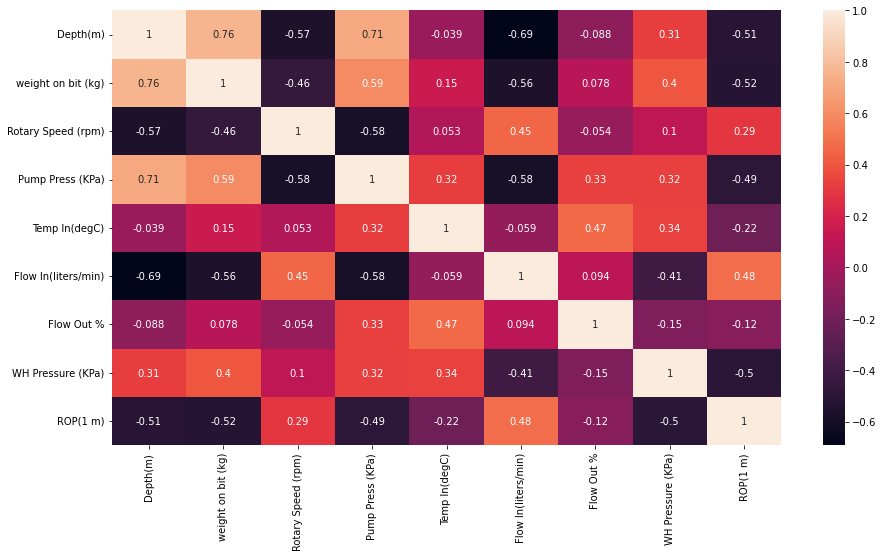

In [11]:
corr1=well_df.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr1, annot=True);

#### Checking for Missing Values in our dataset

In [11]:
well_df.isnull().sum()

Depth(m)               0
weight on bit (kg)     0
Rotary Speed (rpm)     0
Pump Press (KPa)       0
Temp In(degC)          0
Flow In(liters/min)    0
Flow Out %             0
WH Pressure (KPa)      0
ROP(1 m)               0
dtype: int64

 - No Missing input, great!

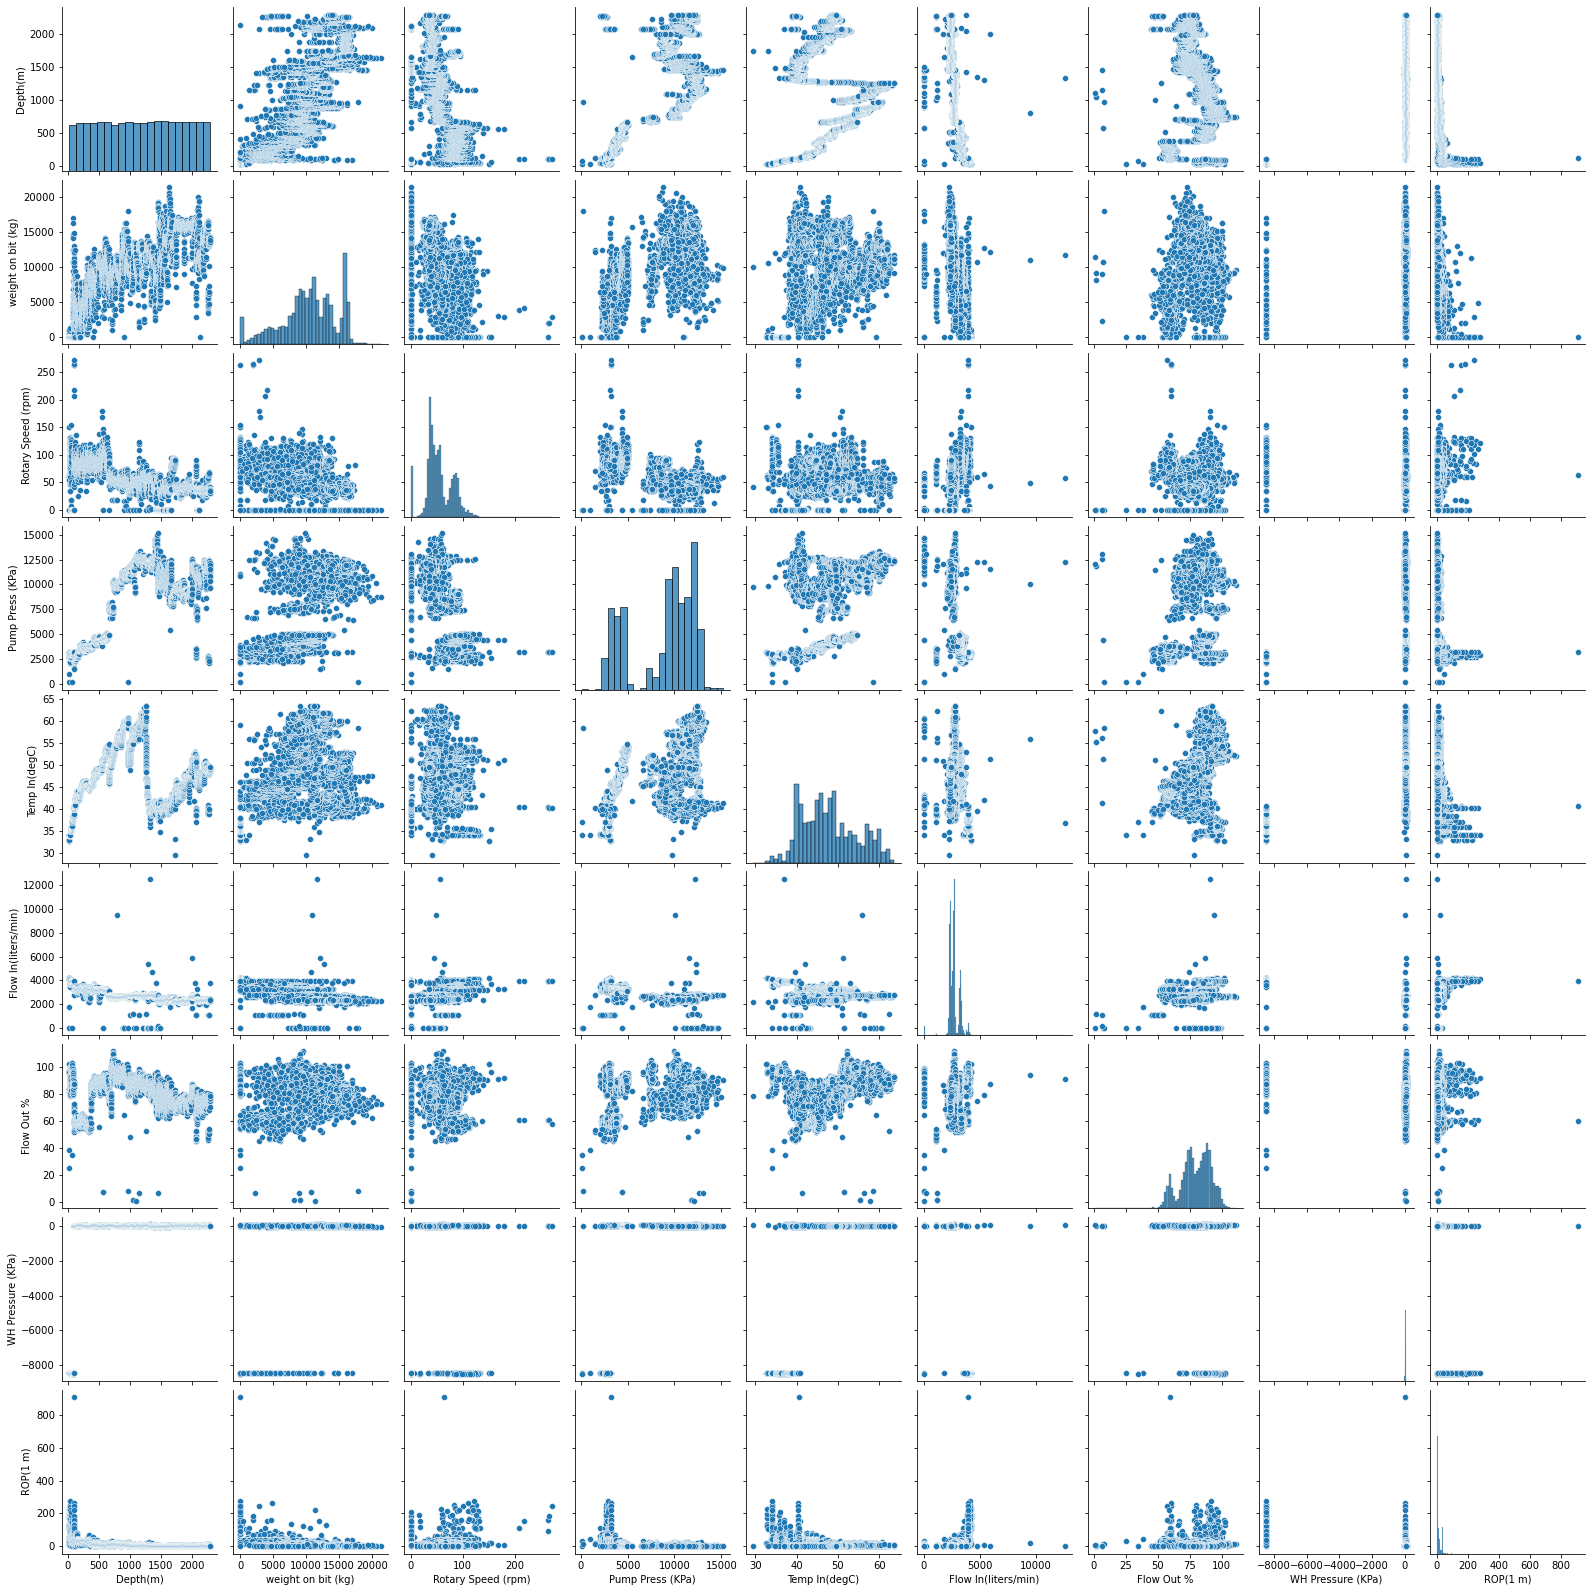

In [12]:
sns.pairplot(well_df);

#### Using boxplot to visualise the distribution of certain features and removing the outliers

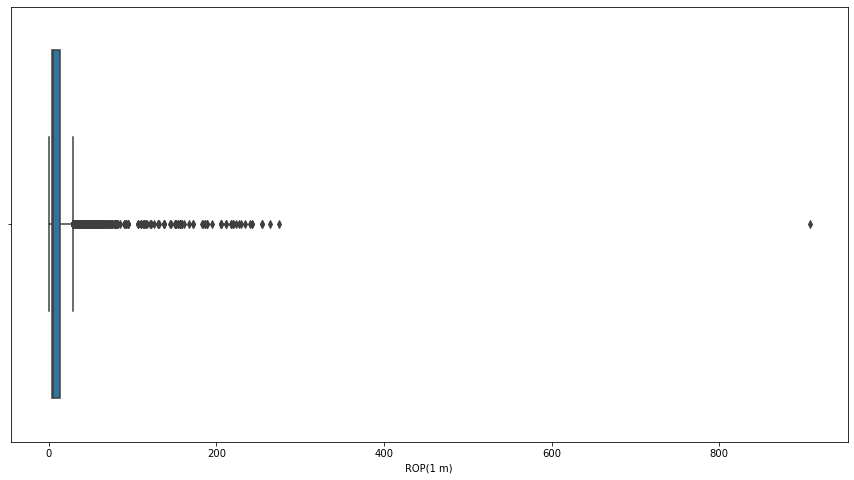

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(well_df['ROP(1 m)']);

In [14]:
well_df=well_df[well_df['ROP(1 m)'] < 800]

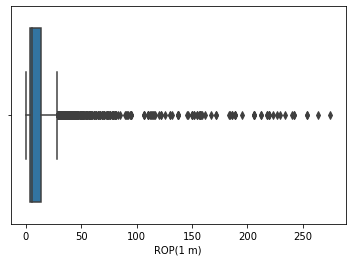

In [15]:
sns.boxplot(well_df['ROP(1 m)']);

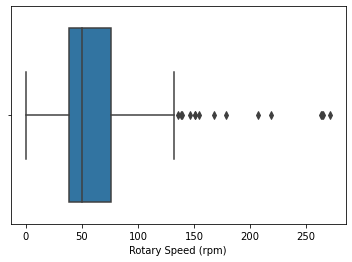

In [16]:
sns.boxplot(well_df['Rotary Speed (rpm)']);

In [17]:
well_df=well_df[well_df['Rotary Speed (rpm)']<200]

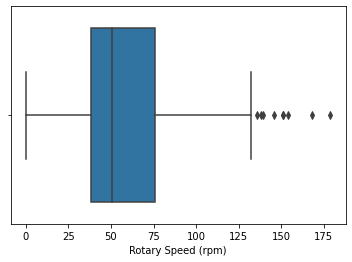

In [18]:
sns.boxplot(well_df['Rotary Speed (rpm)']);

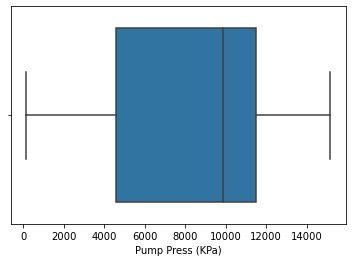

In [19]:
sns.boxplot(well_df['Pump Press (KPa)']);

<AxesSubplot:xlabel='Flow In(liters/min)'>

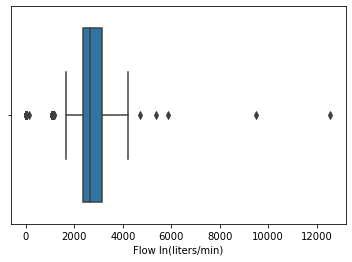

In [20]:
sns.boxplot(well_df['Flow In(liters/min)'])

In [21]:
well_df=well_df[well_df['Flow In(liters/min)'] < 7000]

<AxesSubplot:xlabel='Flow In(liters/min)'>

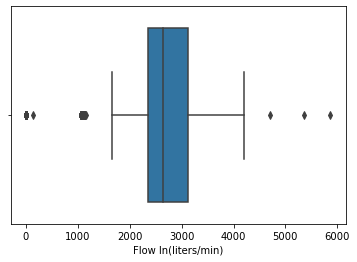

In [22]:
sns.boxplot(well_df['Flow In(liters/min)'])

<AxesSubplot:xlabel='Flow Out %'>

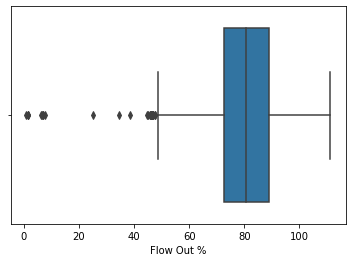

In [23]:
sns.boxplot(well_df['Flow Out %'])

In [24]:
well_df=well_df[well_df['Flow Out %']>20]

<AxesSubplot:xlabel='Flow Out %'>

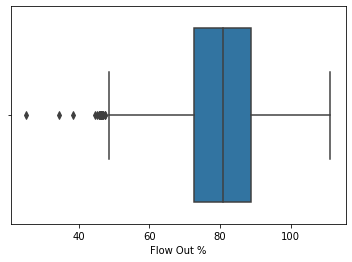

In [25]:
sns.boxplot(well_df['Flow Out %'])

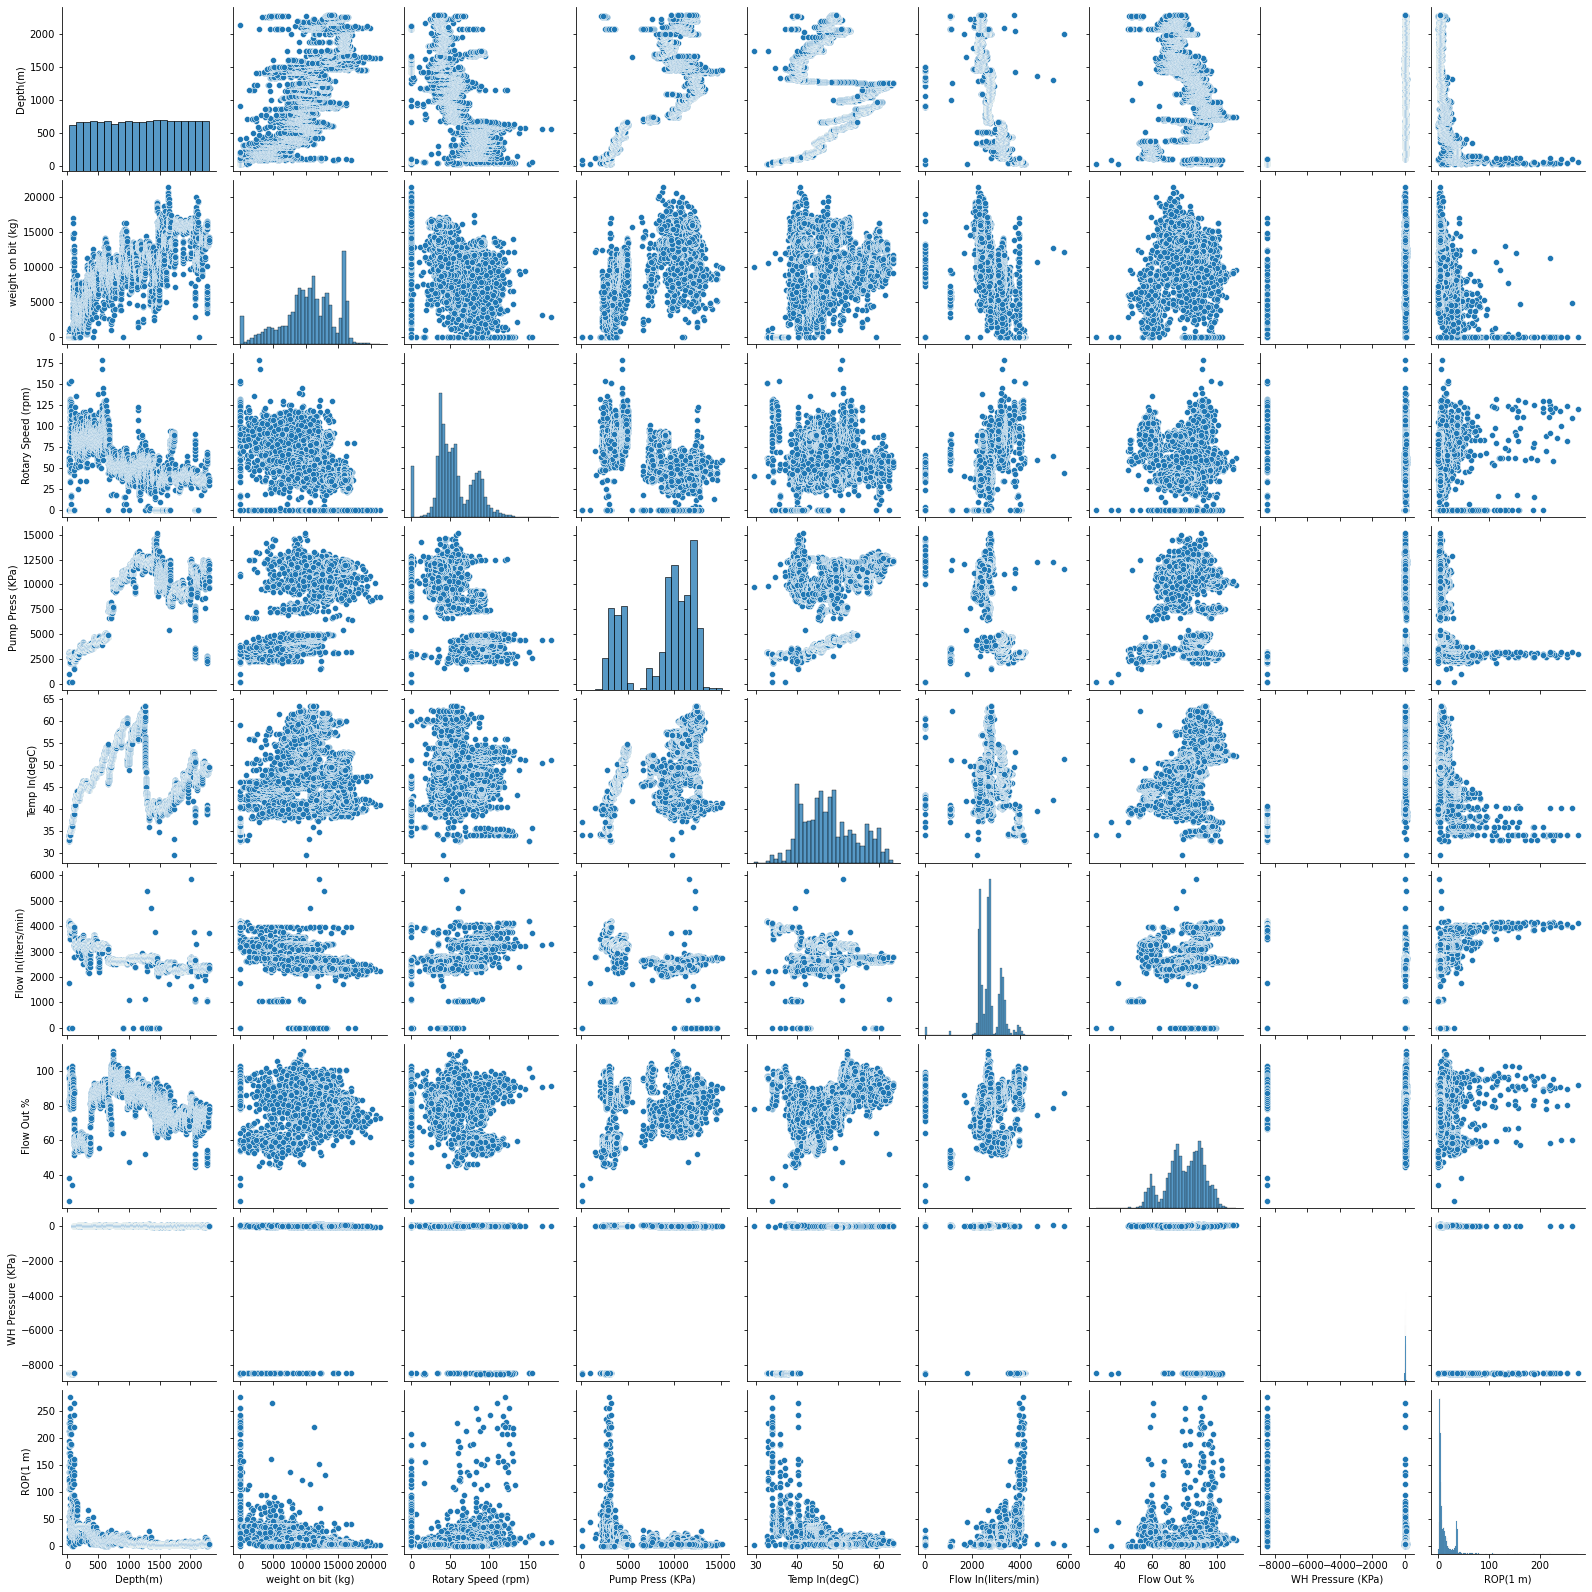

In [26]:
sns.pairplot(well_df)

#### Saving our non-outlier dataset into a new dataset to be used for the building of the model

In [27]:
well_df.to_csv('welldata_NonOutlier.csv',index=False)

In [28]:
well_df.describe()

,Depth(m),weight on bit (kg),Rotary Speed (rpm),Pump Press (KPa),Temp In(degC),Flow In(liters/min),Flow Out %,WH Pressure (KPa),ROP(1 m)
count,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000,7293.000000
mean,1170.125075,10492.418940,54.855718,8737.605204,47.953857,2710.542394,79.801318,-247.226347,12.569735
std,654.397245,4130.250795,25.296998,3378.177407,6.626395,511.248043,11.607860,1537.143209,20.194831
min,25.960000,0.000000,0.000000,137.490000,29.440000,0.000000,25.110000,-8493.470000,0.000000
25%,601.940000,8308.390000,38.120000,4593.170000,42.720000,2347.940000,72.700000,20.130000,3.470000
50%,1176.130000,10807.260000,50.380000,9877.500000,47.340000,2650.580000,80.770000,40.960000,5.470000
75%,1736.100000,13460.320000,75.950000,11510.100000,52.700000,3120.960000,88.860000,56.950000,13.460000
max,2296.940000,21337.870000,178.860000,15171.960000,63.510000,5864.130000,111.210000,120.040000,274.750000


### Exploratory Data Analysis on the new non outlier dataset

In [13]:
well_df=pd.read_csv(r"C:\Users\User\Desktop\Machine Learning Project\ROP Prediction\welldata_NonOutlier.csv")
print("Shape :", well_df.shape)
well_df.head()

Shape : (7293, 9)


,Depth(m),weight on bit (kg),Rotary Speed (rpm),Pump Press (KPa),Temp In(degC),Flow In(liters/min),Flow Out %,WH Pressure (KPa),ROP(1 m)
0,25.96,0.0,151.09,3197.35,32.71,4200.22,101.61,-8485.61,17.31
1,26.27,0.0,151.09,3168.46,32.68,4195.60,101.70,-8485.61,18.63
2,26.59,0.0,61.54,3134.26,32.73,4174.82,96.81,-8485.61,5.66
3,26.90,0.0,60.23,3110.61,32.86,4167.89,96.67,-8485.61,11.67
4,27.24,0.0,61.75,3144.74,32.88,4173.26,96.63,-8485.61,120.20


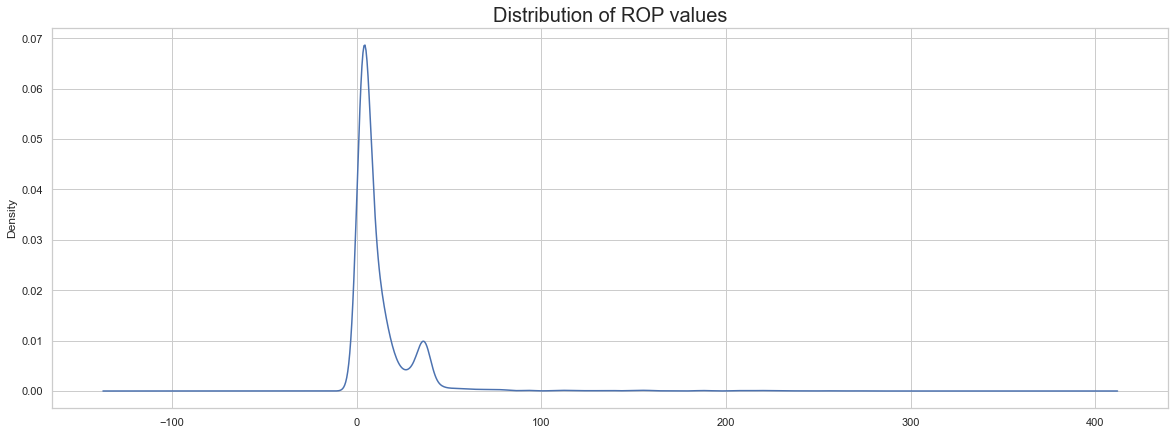

In [27]:
plt.figure(figsize=(20,7))
well_df['ROP(1 m)'].plot(kind='kde')
plt.title("Distribution of ROP values", size=20);

#### Visualization of the variation of some features with the target feature ( Rate of Penetration)

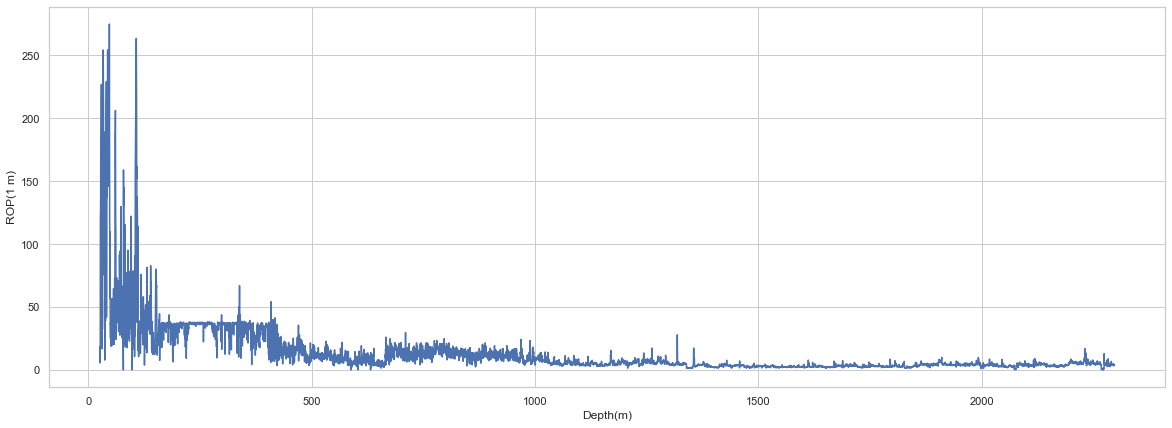

In [19]:
def graph(a,b):
    plt.figure(figsize=(20,7))
    sns.lineplot(x=a, y=b)
    plt.show()

graph(well_df['Depth(m)'], well_df['ROP(1 m)'])

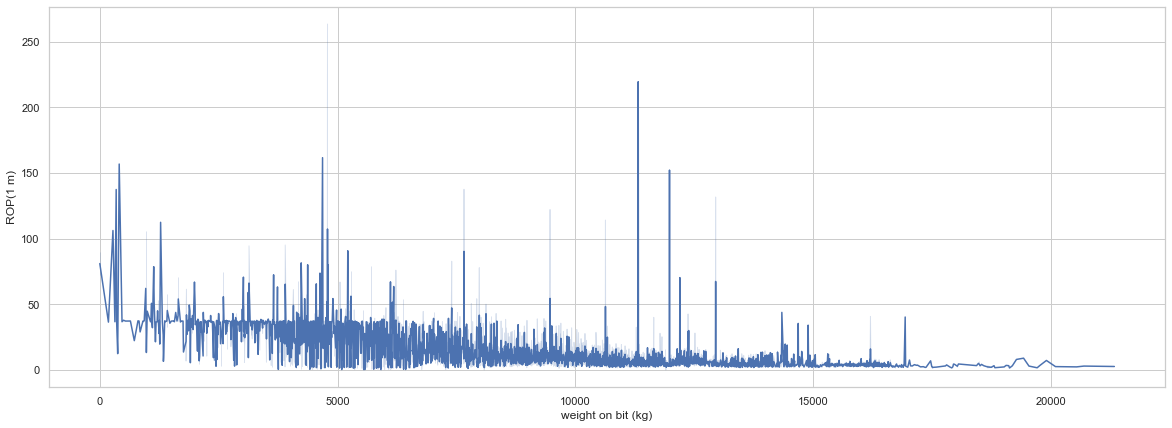

In [20]:
graph(well_df['weight on bit (kg)'], well_df['ROP(1 m)'])

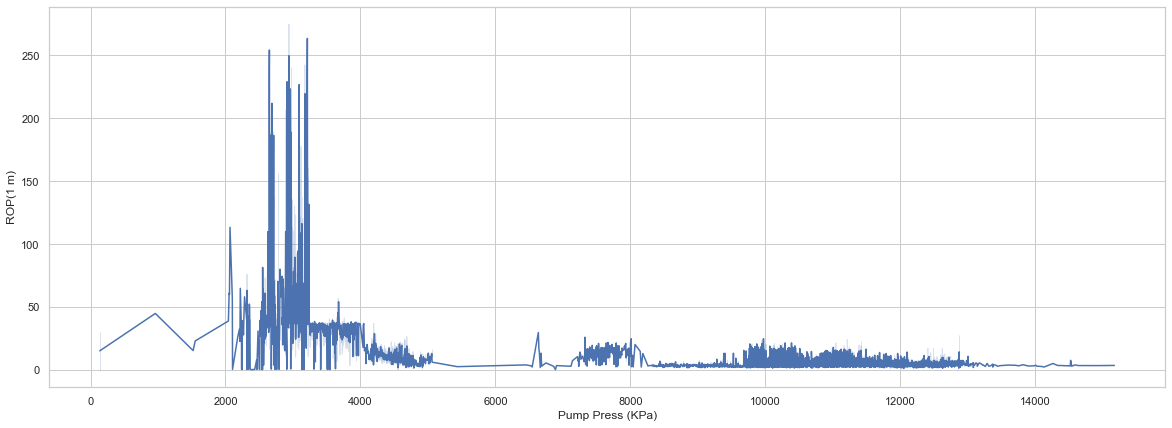

In [21]:
graph(well_df['Pump Press (KPa)'], well_df['ROP(1 m)'])

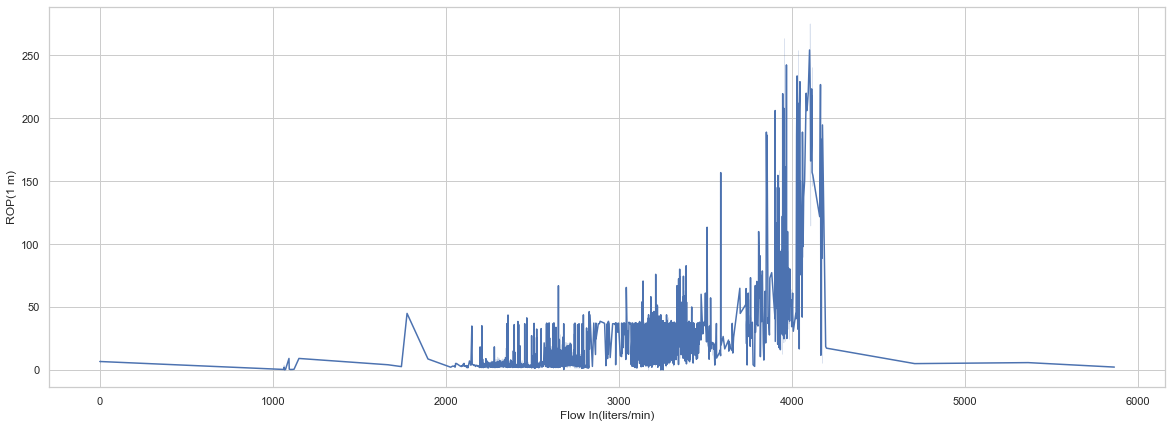

In [22]:
graph(well_df['Flow In(liters/min)'], well_df['ROP(1 m)'])